In [0]:
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/train.csv          
   creating: data/images/
  inflating: data/images/0.jpg       
  inflating: data/images/1.jpg       
  inflating: data/images/1002.jpg    
  inflating: data/images/1004.jpg    
  inflating: data/images/1007.jpg    
  inflating: data/images/1011.jpg    
  inflating: data/images/1012.jpg    
  inflating: data/images/1014.jpg    
  inflating: data/images/1017.jpg    
  inflating: data/images/1019.jpg    
  inflating: data/images/1020.jpg    
  inflating: data/images/1024.jpg    
  inflating: data/images/1027.jpg    
  inflating: data/images/1028.jpg    
  inflating: data/images/1029.jpg    
  inflating: data/images/103.jpg     
  inflating: data/images/1030.jpg    
  inflating: data/images/1031.jpg    
  inflating: data/images/1032.jpg    
  inflating: data/images/1035.jpg    
  inflating: data/images/104.jpg     
  inflating: data/images/1044.jpg    
  inflating: data/images/1045.jpg    
  inflating: data/images

In [3]:
df = pd.read_csv('data/train.csv')
images = []
for image_name in tqdm(df['image_names']):
                image = 'data/images/' + str(image_name)
                # reading images using opencv
                image = cv2.imread(image)
                # resizing the image as height 224 and width 224
                image_resized = cv2.resize(image,(224,224))
                # appending image to the images list
                images.append(np.array(image,'float32'))
                

100%|██████████| 1646/1646 [00:02<00:00, 662.91it/s]


In [0]:
labels = df['emergency_or_not'].values
images = np.array(images)/255.0
labels = np.array(labels)

images = np.reshape(images,(images.shape[0],224,224,3))
labels = to_categorical(labels)

Not


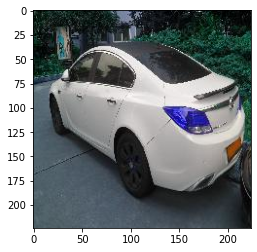

In [5]:
index=4
plt.imshow(images[index])
if (df['emergency_or_not'][index]== 1):
  print("Emergency Vehicles ")
else:
  print("Not")

In [0]:
num_features = 64
num_labels = 2
width, height, channels = 224, 224, 3
train_aug = ImageDataGenerator(rescale = 1./255,rotation_range=20,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
test_aug = ImageDataGenerator(rescale = 1./255)

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, channels), data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))




model.add(Flatten())


model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(num_labels, activation='softmax'))

In [9]:
BATCH_SIZE = 32
EPOCHS = 20       

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1)

checkpoint = ModelCheckpoint('vehicles_model.h5',monitor='val_loss',verbose=0,
                            save_best_only='True',mode='auto')

history = model.fit(images,labels,batch_size=BATCH_SIZE,
                    callbacks=[lr_reducer,checkpoint],epochs=EPOCHS,
                    validation_split = 0.2)

Epoch 1/20
42/42 [==============================] - 431s 10s/step - loss: 22.6335 - accuracy: 0.6011 - val_loss: 6.1569 - val_accuracy: 0.5697 - lr: 0.0010
Epoch 2/20
42/42 [==============================] - 430s 10s/step - loss: 13.7141 - accuracy: 0.6596 - val_loss: 5.9129 - val_accuracy: 0.4333 - lr: 0.0010
Epoch 3/20
42/42 [==============================] - 425s 10s/step - loss: 8.2485 - accuracy: 0.6383 - val_loss: 27.4834 - val_accuracy: 0.6212 - lr: 0.0010
Epoch 4/20
42/42 [==============================] - 428s 10s/step - loss: 4.6856 - accuracy: 0.6907 - val_loss: 2.1168 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 5/20
42/42 [==============================] - 425s 10s/step - loss: 3.8296 - accuracy: 0.6801 - val_loss: 9.3839 - val_accuracy: 0.6212 - lr: 0.0010
Epoch 6/20
42/42 [==============================] - 426s 10s/step - loss: 3.1347 - accuracy: 0.7188 - val_loss: 1.8710 - val_accuracy: 0.6273 - lr: 0.0010
Epoch 7/20
42/42 [==============================] - 425s 10s/step -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


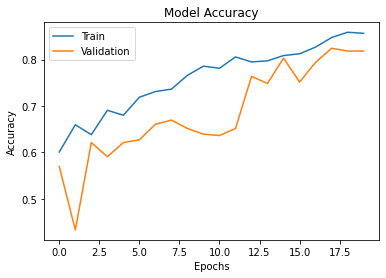

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc = 'upper_left')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


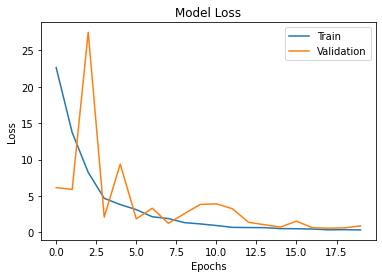

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc = 'upper_left')